In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
df = pd.read_csv(r"D:\csv\Test set.csv")

In [3]:
df

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [5]:
df.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


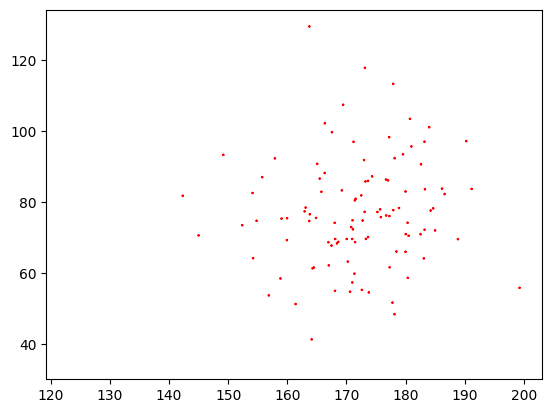

In [6]:
plt.scatter(df.Height,df.Weight,df.Sex,marker='*',color='red')

In [7]:
df.shape

(205, 3)

In [8]:
from sklearn.model_selection import train_test_split
X = df[['Height','Weight']]
Y = df['Sex']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
X_train

,Height,Weight
87,166.337442,102.142888
84,146.281581,59.473912
167,172.506495,81.796688
96,175.819637,75.687860
177,151.000864,85.804131
...,...,...
72,144.413196,57.586685
131,139.330919,50.947279
155,162.918695,77.307075
50,173.074815,77.177877


In [10]:
Y_train


87     1
84     0
167    1
96     1
177    0
      ..
72     0
131    0
155    1
50     1
28     1
Name: Sex, Length: 164, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [14]:
model.score(X_test,Y_test)

0.926829268292683

In [15]:
model.predict_proba(X_test)

array([[0.06372537, 0.93627463],
       [0.23293008, 0.76706992],
       [0.452533  , 0.547467  ],
       [0.99098469, 0.00901531],
       [0.97463519, 0.02536481],
       [0.9931567 , 0.0068433 ],
       [0.06884773, 0.93115227],
       [0.00700931, 0.99299069],
       [0.2813931 , 0.7186069 ],
       [0.38379267, 0.61620733],
       [0.7702898 , 0.2297102 ],
       [0.98926041, 0.01073959],
       [0.95746984, 0.04253016],
       [0.01290058, 0.98709942],
       [0.93253648, 0.06746352],
       [0.01039961, 0.98960039],
       [0.02915259, 0.97084741],
       [0.99874341, 0.00125659],
       [0.18423568, 0.81576432],
       [0.7759414 , 0.2240586 ],
       [0.89509612, 0.10490388],
       [0.87437238, 0.12562762],
       [0.07921611, 0.92078389],
       [0.8575159 , 0.1424841 ],
       [0.99595775, 0.00404225],
       [0.25192788, 0.74807212],
       [0.89081894, 0.10918106],
       [0.01298201, 0.98701799],
       [0.01884641, 0.98115359],
       [0.03205432, 0.96794568],
       [0.

In [16]:
y_pred = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_pred)

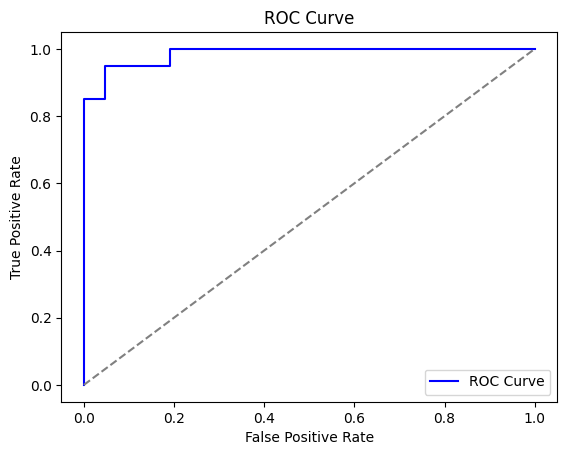

In [17]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [18]:
auc = roc_auc_score(Y_test, y_pred)
print("AUC Score:", auc)

AUC Score: 0.9857142857142858
